In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def array(x):
    return x
def parse_list_col(x):
    return eval(x)[0]
def mean_list_col(x):
    return pd.DataFrame(x.values.tolist()).apply("mean", axis = 0).values.tolist()
def std_list_col(x):
    x =  pd.DataFrame(x.values.tolist()).apply("std", axis = 0).values.tolist()
    # print(x)
    return x
def upper_conf_list_col(x):
    mean = mean_list_col(x)
    std = std_list_col(x)
    return (np.array(mean) + 1.96 * np.array(std)).tolist()
def lower_conf_list_col(x):
    mean = mean_list_col(x)
    std = std_list_col(x)
    return (np.array(mean) - 1.96 * np.array(std)).tolist()
    
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [5]:
df = pd.read_csv("../data/output/NNRegressor-nnsummary.csv")
df["fprs"] = df["fprs"].apply(parse_list_col)
df["tprs"] = df["tprs"].apply(parse_list_col)
df= df.iloc[:,4:10]

In [6]:
df

,r2,mse,opt_func,loss_func,hidden_layer_size,layers_length
0,0.341675,6.780637,Adam,mean_squared_error,5,2
1,0.341657,6.780818,Adam,mean_squared_error,5,2
2,0.341579,6.781623,Adam,mean_squared_error,5,2
3,0.341637,6.781027,Adam,mean_squared_error,5,2
4,0.342047,6.776800,Adam,mean_squared_error,5,2
5,0.344310,6.753488,Adam,mean_squared_error,5,2
6,0.341631,6.781089,Adam,mean_squared_error,5,2
7,0.341549,6.781935,Adam,mean_squared_error,5,2
8,0.341611,6.781288,Adam,mean_squared_error,5,2
9,0.341620,6.781202,Adam,mean_squared_error,5,2


In [9]:
# print(summary_df)
summary_df = df.groupby(["opt_func","loss_func","hidden_layer_size","layers_length"]).agg(
    mean_r2_scores = ("r2","mean"),
    std_r2_scores  = ("r2","std"),
    upper_conf_r2_scores  = ("r2", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_r2_scores  = ("r2", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_mse      = ("mse","mean"),
    std_mse       = ("mse","std"),
    upper_conf_mse  = ("mse", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_mse  = ("mse", lambda x: np.mean(x) - np.std(x)*1.96),
).reset_index()

In [10]:
summary_df

,opt_func,loss_func,hidden_layer_size,layers_length,mean_r2_scores,std_r2_scores,upper_conf_r2_scores,lower_conf_r2_scores,mean_mse,std_mse,upper_conf_mse,lower_conf_mse
0,Adam,mean_squared_error,5,2,0.341932,0.000847,0.343507,0.340356,6.777991,0.008728,6.794219,6.761762
1,Adam,mean_squared_error,5,5,0.342675,0.002471,0.347269,0.338081,6.770329,0.025448,6.817648,6.723011
2,SGD,mean_squared_error,5,2,-0.000181,0.000005,-0.000172,-0.000191,10.301694,0.000052,10.301792,10.301597
3,SGD,mean_squared_error,5,5,-0.000779,0.001186,0.001426,-0.002984,10.307847,0.012214,10.330559,10.285136


In [11]:
print(summary_df[["opt_func","hidden_layer_size","layers_length","mean_r2_scores","std_r2_scores","upper_conf_r2_scores","lower_conf_r2_scores"]].to_latex(header = ["Optimisation Function", 
"Neurons Per Hidden Layer", 
"Hidden Layers", 
"Mean r2 Score",
"r2 Score Std. dev", 
"r2 Score Upper 95% CI", 
"r2 Score Lower 95% CI"]))

\begin{tabular}{llrrrrrr}
\toprule
{} & Optimisation Function & Neurons Per Hidden Layer & Hidden Layers & Mean r2 Score & r2 Score Std. dev & r2 Score Upper 95\% CI & r2 Score Lower 95\% CI \\
\midrule
0 &                  Adam &                        5 &             2 &      0.341932 &          0.000847 &              0.343507 &              0.340356 \\
1 &                  Adam &                        5 &             5 &      0.342675 &          0.002471 &              0.347269 &              0.338081 \\
2 &                   SGD &                        5 &             2 &     -0.000181 &          0.000005 &             -0.000172 &             -0.000191 \\
3 &                   SGD &                        5 &             5 &     -0.000779 &          0.001186 &              0.001426 &             -0.002984 \\
\bottomrule
\end{tabular}



In [12]:
print(summary_df[["opt_func","hidden_layer_size","layers_length","mean_mse","std_mse","upper_conf_mse","lower_conf_mse"]].to_latex(header = ["Optimisation Function", 
"Neurons Hidden Layer", 
"Hidden Layers", 
"Mean MSE",
"MSE Std. dev", 
"MSE Upper 95% CI", 
"MSE Lower 95% CI"]))

\begin{tabular}{llrrrrrr}
\toprule
{} & Optimisation Function & Neurons Hidden Layer & Hidden Layers &   Mean MSE & MSE Std. dev & MSE Upper 95\% CI & MSE Lower 95\% CI \\
\midrule
0 &                  Adam &                    5 &             2 &   6.777991 &     0.008728 &         6.794219 &         6.761762 \\
1 &                  Adam &                    5 &             5 &   6.770329 &     0.025448 &         6.817648 &         6.723011 \\
2 &                   SGD &                    5 &             2 &  10.301694 &     0.000052 &        10.301792 &        10.301597 \\
3 &                   SGD &                    5 &             5 &  10.307847 &     0.012214 &        10.330559 &        10.285136 \\
\bottomrule
\end{tabular}



[0.0, 0.009803919999999999, 0.009803919999999999, 0.029411760000000002, 0.029411760000000002, 0.039215690000000004, 0.039215690000000004, 0.04901961, 0.04901961, 0.06862745000000002, 0.06862745000000002, 0.07843137, 0.07843137, 0.08823528999999998, 0.08823528999999998, 0.09803922, 0.09803922, 0.10784313999999998, 0.10784313999999998, 0.12745097999999996, 0.12745097999999996, 0.18627451000000003, 0.18627451000000003, 0.20588235, 0.20588235, 0.21568627, 0.21568627, 0.2254902, 0.2254902, 0.24509803999999996, 0.24509803999999996, 0.2549019599999999, 0.2549019599999999, 0.26470588000000006, 0.26470588000000006, 0.28431373, 0.28431373, 0.29411765, 0.29411765, 0.30392157, 0.30392157, 0.31372549, 0.31372549, 0.34313724999999995, 0.34313724999999995, 0.3529411800000001, 0.3529411800000001, 0.36274510000000004, 0.36274510000000004, 0.37254902000000006, 0.37254902000000006, 0.40196078, 0.40196078, 0.44117646999999993, 0.44117646999999993, 0.4509803899999999, 0.4509803899999999, 0.47058824, 0.4705

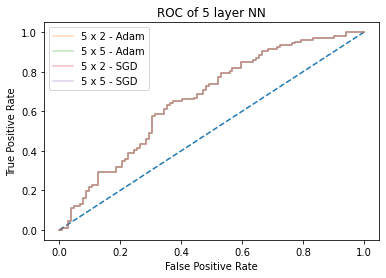

In [26]:
    plt.clf()
    plt.plot([0, 1], [0, 1], linestyle="--", label="")
    for _, row in summary_df.iterrows():
#         print(row["hidden_layer_size"])
        print(row["mean_fprs"])
        print(row["mean_tprs"])
        fpr = row["mean_fprs"]
        tpr = row["mean_tprs"]
#         fpr = row["fprs"]
#         tpr = row["tprs"]
#         print(type(fpr))
        h_size = row["hidden_layer_size"]
        layers_length = row["layers_length"]
        opt_func = row["opt_func"]
        lbl=f"{h_size} x {layers_length} - {opt_func}"
#         print(lbl)
        plt.plot(
            fpr,
            tpr,
            linestyle="-",
            label=lbl, 
            alpha = 0.3
    )
    tlt = f"ROC of {x} layer NN"
    plt.title(tlt)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()


\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}         &        r2        & \textbf{  R-squared:         } &     1.000   \\
\textbf{Model:}                 &       OLS        & \textbf{  Adj. R-squared:    } &     1.000   \\
\textbf{Method:}                &  Least Squares   & \textbf{  F-statistic:       } & 2.767e+05   \\
\textbf{Date:}                  & Mon, 23 Nov 2020 & \textbf{  Prob (F-statistic):} &  5.82e-78   \\
\textbf{Time:}                  &     20:01:08     & \textbf{  Log-Likelihood:    } &    206.05   \\
\textbf{No. Observations:}      &          40      & \textbf{  AIC:               } &    -406.1   \\
\textbf{Df Residuals:}          &          37      & \textbf{  BIC:               } &    -401.0   \\
\textbf{Df Model:}              &           2      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                                & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     r2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.767e+05
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           5.82e-78
Time:                        20:01:08   Log-Likelihood:                 206.05
No. Observations:                  40   AIC:                            -406.1
Df Residuals:                      37   BIC:                            -401.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3423      0.000    857.716      0.000       0.341       0.343
C(layers_length)[T.5]  7.323e-05      0.000      0.159      0.875      -0.001       0.001
opt_func[T.SGD]          -0.3428      0.000   -743.925      0.000      -0.344      -0.342
==============================================================================
Omnibus:                       50.424   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.539
Skew:                           2.772   Prob(JB):                     1.53e-75
Kurtosis:                      16.266   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

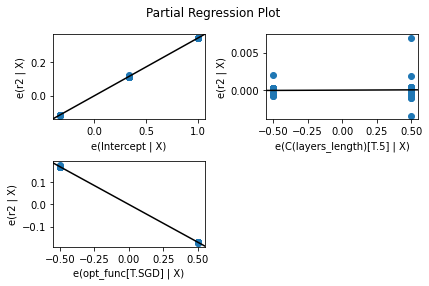

In [13]:
summary_df_model = df[["r2","opt_func","loss_func", "hidden_layer_size","layers_length"]]
mod = smf.ols(formula='r2 ~ C(layers_length) + C(hidden_layer_size) + loss_func + opt_func', data=summary_df_model)
res = mod.fit()
print(res.summary().as_latex())
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout(pad=1.0)
res.summary()